## Notebook 5 - Timeline Analysis

In [1]:
import sys
print(sys.version)
print(spark.version)

3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]
3.1.3


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [4]:
pd.set_option("max_colwidth", 200)

In [5]:
from google.cloud import storage
# !pip install gcsfs --upgrade

### Setting Up Helper Functions

In [6]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

### Accessing Filtered Database

In [7]:
twitter_df6= spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/kshitijm/Final_Project-FiltData3')


In [8]:
twitter_df6.limit(15)

23/03/10 00:57:54 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


id,created_at,text,tweet_text,tweet_coordinates,tweet_country,tweet_country_code,tweet_place_full_name,tweet_place_type,is_reply,is_quote,is_retweeted,reply_count,quote_count,retweet_count,favorite_count,rp_original_id,rp_user_id,rp_original_user,qu_original_id,rt_original_id,rt_original_user,account_id,account_name,account_description,account_location,is_verified,total_followers,total_friends,total_listed,total_favourites,total_tweets,account_created_at,account_profile_picture,hashtags,tweet_type
1566378682318462976,Sun Sep 04 10:52:...,RT @C_A_Graham: H...,had another conve...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566034383559065601,C_A_Graham,483864332,erin_gilbey,Storyteller and 1...,"Birmingham, England",false,442,601,8,15433,8431,Sun Feb 05 13:37:...,https://pbs.twimg...,[],retweet
1566378688698097664,Sun Sep 04 10:52:...,RT @Oludeewon: I ...,i hope you have s...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566165377796771840,Oludeewon,984182548791164928,Odeshiye,♎ ...So A Child M...,Ghana,false,4902,4613,3,149571,92052,Wed Apr 11 21:32:...,https://pbs.twimg...,[],retweet
1566378715709427719,Sun Sep 04 10:52:...,RT @JackPosobiec:...,breaking: @trinit...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1565431877460189189,JackPosobiec,1558859689789644800,EuroAmerican87,American by birth...,Anywhere but here...,false,6,34,1,50,89,Sun Aug 14 16:54:...,https://pbs.twimg...,[],retweet
1566378716887916546,Sun Sep 04 10:52:...,RT @amishra77: Th...,the appalling con...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566378309520596993,amishra77,1279643153474224130,Bharath12450842,One of the 900 mi...,null,false,193,502,0,6244,9146,Sun Jul 05 05:09:...,https://pbs.twimg...,[],retweet
1566378724135555072,Sun Sep 04 10:52:...,RT @imzarvinnn: S...,senior high schoo...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566034947831660545,imzarvinnn,1530893925803622401,lvchdvmp,I'm counting on y...,archen's heart,false,341,458,0,11632,5624,Sun May 29 12:49:...,https://pbs.twimg...,[],retweet
1566378734529101824,Sun Sep 04 10:52:...,RT @imzarvinnn: S...,senior high schoo...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566034947831660545,imzarvinnn,1398282464854827012,doyiea_,she/her ...,null,false,1,91,0,59,621,Fri May 28 14:18:...,https://pbs.twimg...,[],retweet
1566378741508734976,Sun Sep 04 10:52:...,You can also tag ...,you can also tag ...,null,null,null,null,null,true,false,,0,0,0,0,1566378738438533120,1299666479344807937,thxteacher,null,null,null,1299666479344807937,thxteacher,Our Teachers are ...,null,false,902,69,1,325,1257,Sat Aug 29 11:13:...,https://pbs.twimg...,"[TeachersDay, Tha...",reply
1566378743710744576,Sun Sep 04 10:52:...,RT @cutedevil5934...,"""teachers play a ...",null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566366649912938498,cutedevil5934,769516988335067137,shoaibAlam28,http://Instagram....,"Jamui, India",false,85,146,0,1434,5245,Sat Aug 27 12:48:...,https://pbs.twimg...,[],retweet
1566378745539469312,Sun Sep 04 10:52:...,@jenqissante ! 🧚...,@jenqissante ! 🧚...,null,null,null,null,null,true,true,,0,0,0,0,1566373182810234882,1547185772708909056,jenqissante,1496397166339932162,null,null,1307586299893702656,PaperupPh,more than 1k+ wor...,10AM-10PM,false,520,182,2,95,820,Sun Sep 20 07:44:...,https://pbs.twimg...,[],quote
1566378750090027008,Sun Sep 04 10:52:...,RT @SethAbramson:...,like... one of hi...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566236400785264640,SethAbramson,1269070500082450437,ResisterNell,"Activist, #Resist...",Kentucky,false,9745,10379,16,463255,333552,Sat Jun 06 00:57:...,https://pbs.twimg...,[],retweet


In [10]:
# Filtering for only tweets
twitter_df6_tweets=twitter_df6.filter(col('tweet_type')=='original_tweet')
twitter_df6_tweets.limit(15)

id,created_at,text,tweet_text,tweet_coordinates,tweet_country,tweet_country_code,tweet_place_full_name,tweet_place_type,is_reply,is_quote,is_retweeted,reply_count,quote_count,retweet_count,favorite_count,rp_original_id,rp_user_id,rp_original_user,qu_original_id,rt_original_id,rt_original_user,account_id,account_name,account_description,account_location,is_verified,total_followers,total_friends,total_listed,total_favourites,total_tweets,account_created_at,account_profile_picture,hashtags,tweet_type
1566378788845506560,Sun Sep 04 10:52:...,Today english edu...,today english edu...,null,Poland,PL,"Wroclaw, Poland",city,false,false,,0,0,0,0,null,null,null,null,null,null,1464093317965230080,BabichZarzycka,Aristocrat,"Wrocław, Polska",false,43,168,0,359,2507,Fri Nov 26 04:47:...,https://pbs.twimg...,[],original_tweet
1566378804402323458,Sun Sep 04 10:53:...,@ceo_karnataka @E...,@ceo_karnataka @e...,null,null,null,null,null,false,false,,0,0,0,0,null,882836250054602752,ceo_karnataka,null,null,null,1004869458991636481,aqeeltweet,A simple Indian ?...,"Gulbarga, India",false,3695,4286,0,3135,3105,Thu Jun 07 23:35:...,https://pbs.twimg...,[],original_tweet
1566378865068498947,Sun Sep 04 10:53:...,Resistances Osada...,resistances osada...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,2298538838,fahmiswag,Academics accurac...,المملكة العربية ا...,false,18,77,0,13,2604,Sat Jan 18 21:20:...,https://pbs.twimg...,[],original_tweet
1566379116017901568,Sun Sep 04 10:54:...,PSC 4400 Methodis...,psc 4400 methodis...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,879496394691805184,EssayPaperUK,I AM The Documentary,"Long Beach, CA",false,763,2505,1,334,212343,Tue Jun 27 00:27:...,https://pbs.twimg...,[],original_tweet
1566379138956423169,Sun Sep 04 10:54:...,something about h...,something about h...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,1414908966845370371,usualsy,"lee seyoung, namg...",6 ongoings,false,820,389,9,6628,22758,Tue Jul 13 11:26:...,https://pbs.twimg...,[],original_tweet
1566379279440650240,Sun Sep 04 10:54:...,Man charged in ab...,man charged in ab...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,1328063334172794882,OlumoRocktv,Global News & Ent...,Ireland,false,316,323,0,28,15580,Sun Nov 15 19:52:...,https://pbs.twimg...,[],original_tweet
1566379420201410560,Sun Sep 04 10:55:...,Tips on How to Av...,tips on how to av...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,889327405126397957,getthatrightgtr,Helping You Know ...,Global,false,755,422,9,660,632488,Mon Jul 24 03:32:...,https://pbs.twimg...,"[education, learn...",original_tweet
1566379426945835009,Sun Sep 04 10:55:...,thats my emotiona...,thats my emotiona...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,1555246771944701957,suppiluliumass,for legal reasons...,null,false,21,160,0,208,70,Thu Aug 04 17:38:...,https://pbs.twimg...,[],original_tweet
1566379643413880837,Sun Sep 04 10:56:...,With Prof. Lisa B...,with prof. lisa b...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,158387764,ShaikhaBinjasim,You can find me a...,Kuwait,true,76796,659,143,6833,35252,Tue Jun 22 14:33:...,https://pbs.twimg...,[],original_tweet
1566379715438321666,Sun Sep 04 10:56:...,let me listen to ...,let me listen to ...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,803857296409427968,gotsvnteen,"s/her, 199x | hea...",exo got7 svt ts,false,1096,366,9,54611,54101,Wed Nov 30 07:04:...,https://pbs.twimg...,[],original_tweet


In [11]:
# Out of 27 million data entries, we only have ~3.8 million new tweets
twitter_df6_tweets.count()

3847631

In [20]:
twitter_df6_tweets.select('created_at').show(truncate=False)

+------------------------------+
|created_at                    |
+------------------------------+
|Sun Sep 04 10:52:59 +0000 2022|
|Sun Sep 04 10:53:03 +0000 2022|
|Sun Sep 04 10:53:18 +0000 2022|
|Sun Sep 04 10:54:17 +0000 2022|
|Sun Sep 04 10:54:23 +0000 2022|
|Sun Sep 04 10:54:56 +0000 2022|
|Sun Sep 04 10:55:30 +0000 2022|
|Sun Sep 04 10:55:31 +0000 2022|
|Sun Sep 04 10:56:23 +0000 2022|
|Sun Sep 04 10:56:40 +0000 2022|
|Sun Sep 04 10:56:45 +0000 2022|
|Sun Sep 04 10:56:58 +0000 2022|
|Sun Sep 04 10:56:58 +0000 2022|
|Sun Sep 04 10:57:15 +0000 2022|
|Sun Sep 04 10:57:32 +0000 2022|
|Sun Sep 04 10:58:01 +0000 2022|
|Sun Sep 04 10:58:11 +0000 2022|
|Sun Sep 04 10:58:40 +0000 2022|
|Sun Sep 04 10:58:45 +0000 2022|
|Sun Sep 04 10:59:28 +0000 2022|
+------------------------------+
only showing top 20 rows



In [11]:
# Parsing out date time
from pyspark.sql.functions import to_date
from datetime import datetime

# input_timestamp = "Sun Sep 04 10:52:59 +0000 2022"
# format_string = "EEE MMM dd HH:mm:ss z yyyy"
# print(to_date(input_timestamp,'EEE MMM d HH:mm:ss z yyyy'))


#parsed_timestamp = datetime.strptime(input_timestamp, format_string)

# result = spark.createDataFrame([(parsed_timestamp,)], ["timestamp"]) \
#              .select(to_date("timestamp").alias("date")).head().date



In [12]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")

key,value
spark.sql.legacy....,LEGACY


In [13]:
spark = SparkSession.builder.appName("example").config("spark.sql.legacy.timeParserPolicy", "LEGACY").getOrCreate()


In [14]:
# Parsing out date time
from pyspark.sql.functions import to_date
from datetime import datetime

input_timestamp = "Sun Sep 04 10:52:59 +0000 2022"
format_string = "EEE MMM dd HH:mm:ss z yyyy"
print(to_date(input_timestamp,'EEE MMM d HH:mm:ss z yyyy'))

Column<'to_date(Sun Sep 04 10:52:59 +0000 2022, EEE MMM d HH:mm:ss z yyyy)'>


In [15]:
# Extracted date and timestamp from the created at column (which was in a string format)

twitter_df6_tweets = twitter_df6_tweets\
.withColumn('created_date',to_date(col("created_at"),'EEE MMM dd HH:mm:ss z yyyy'))\
.withColumn('created_time',to_timestamp(col("created_at"),'EEE MMM dd HH:mm:ss z yyyy'))


twitter_df6_tweets.limit(10)

id,created_at,text,tweet_text,tweet_coordinates,tweet_country,tweet_country_code,tweet_place_full_name,tweet_place_type,is_reply,is_quote,is_retweeted,reply_count,quote_count,retweet_count,favorite_count,rp_original_id,rp_user_id,rp_original_user,qu_original_id,rt_original_id,rt_original_user,account_id,account_name,account_description,account_location,is_verified,total_followers,total_friends,total_listed,total_favourites,total_tweets,account_created_at,account_profile_picture,hashtags,tweet_type,created_date,created_time
1566378788845506560,Sun Sep 04 10:52:...,Today english edu...,today english edu...,null,Poland,PL,"Wroclaw, Poland",city,false,false,,0,0,0,0,null,null,null,null,null,null,1464093317965230080,BabichZarzycka,Aristocrat,"Wrocław, Polska",false,43,168,0,359,2507,Fri Nov 26 04:47:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:52:59
1566378804402323458,Sun Sep 04 10:53:...,@ceo_karnataka @E...,@ceo_karnataka @e...,null,null,null,null,null,false,false,,0,0,0,0,null,882836250054602752,ceo_karnataka,null,null,null,1004869458991636481,aqeeltweet,A simple Indian ?...,"Gulbarga, India",false,3695,4286,0,3135,3105,Thu Jun 07 23:35:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:53:03
1566378865068498947,Sun Sep 04 10:53:...,Resistances Osada...,resistances osada...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,2298538838,fahmiswag,Academics accurac...,المملكة العربية ا...,false,18,77,0,13,2604,Sat Jan 18 21:20:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:53:18
1566379116017901568,Sun Sep 04 10:54:...,PSC 4400 Methodis...,psc 4400 methodis...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,879496394691805184,EssayPaperUK,I AM The Documentary,"Long Beach, CA",false,763,2505,1,334,212343,Tue Jun 27 00:27:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:54:17
1566379138956423169,Sun Sep 04 10:54:...,something about h...,something about h...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,1414908966845370371,usualsy,"lee seyoung, namg...",6 ongoings,false,820,389,9,6628,22758,Tue Jul 13 11:26:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:54:23
1566379279440650240,Sun Sep 04 10:54:...,Man charged in ab...,man charged in ab...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,1328063334172794882,OlumoRocktv,Global News & Ent...,Ireland,false,316,323,0,28,15580,Sun Nov 15 19:52:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:54:56
1566379420201410560,Sun Sep 04 10:55:...,Tips on How to Av...,tips on how to av...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,889327405126397957,getthatrightgtr,Helping You Know ...,Global,false,755,422,9,660,632488,Mon Jul 24 03:32:...,https://pbs.twimg...,"[education, learn...",original_tweet,2022-09-04,2022-09-04 10:55:30
1566379426945835009,Sun Sep 04 10:55:...,thats my emotiona...,thats my emotiona...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,1555246771944701957,suppiluliumass,for legal reasons...,null,false,21,160,0,208,70,Thu Aug 04 17:38:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:55:31
1566379643413880837,Sun Sep 04 10:56:...,With Prof. Lisa B...,with prof. lisa b...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,158387764,ShaikhaBinjasim,You can find me a...,Kuwait,true,76796,659,143,6833,35252,Tue Jun 22 14:33:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:56:23
1566379715438321666,Sun Sep 04 10:56:...,let me listen to ...,let me listen to ...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,803857296409427968,gotsvnteen,"s/her, 199x | hea...",exo got7 svt ts,false,1096,366,9,54611,54101,Wed Nov 30 07:04:...,https://pbs.twimg...,[],original_tweet,2022-09-04,2022-09-04 10:56:40


In [16]:
# Grouping by number of tweets by date

In [17]:
date_tweets=twitter_df6_tweets\
.select('id','created_date')\
.groupBy('created_date')\
.agg(count('id'))\
.alias('total_tweets')\
.orderBy('created_date')

In [18]:
date_tweets_p=date_tweets.toPandas()

In [19]:
date_tweets_p.head()
date_tweets_p=date_tweets_p.rename(columns={'created_date':'created_date','count(id)':'total_tweets'})
date_tweets_p.to_csv('date_tweets_p.csv')

In [20]:
date_tweets_p.head()

,created_date,total_tweets
0,2022-04-05,12132
1,2022-04-06,14337
2,2022-04-07,14444
3,2022-04-08,14648
4,2022-04-09,9521


In [21]:
print("First date: ",date_tweets_p['created_date'].min())
print("Last date: ",date_tweets_p['created_date'].max())

First date:  2022-04-05
Last date:  2023-02-08


In [22]:
print("Highest tweets: ",date_tweets_p['total_tweets'].max())
date_tweets_p[date_tweets_p.total_tweets==date_tweets_p['total_tweets'].max()]

Highest tweets:  30958


,created_date,total_tweets
50,2022-05-25,30958


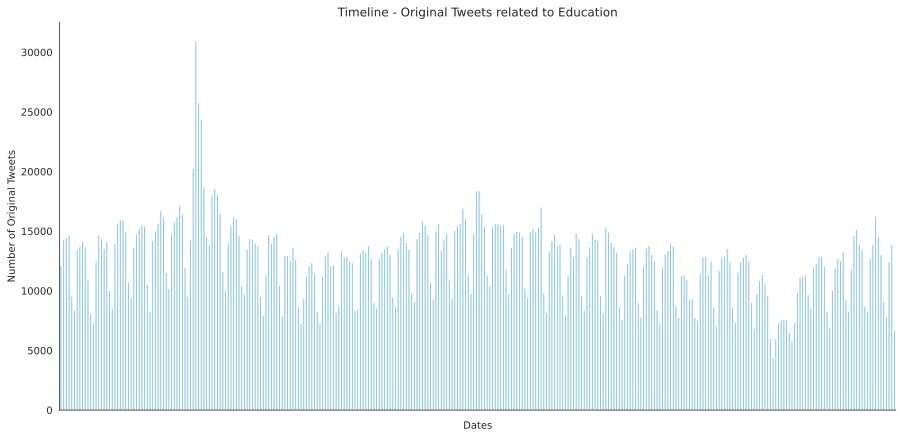

In [34]:
sns.set_style("white")
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

sns.barplot(x="created_date", y="total_tweets", data=date_tweets_p, color="skyblue")

plt.title('Timeline - Original Tweets related to Education')
plt.xlabel('Dates')
plt.ylabel('Number of Original Tweets')

axes.set(xticklabels=[])

sns.despine()
plt.xticks(rotation=90)
#plt.savefig("date_tweets.svg", transparent=True)

plt.show()

In [25]:
date_tweets_p.nlargest(20,'total_tweets')

,created_date,total_tweets
50,2022-05-25,30958
51,2022-05-26,25762
52,2022-05-27,24331
49,2022-05-24,20249
53,2022-05-28,18662
57,2022-06-01,18579
155,2022-09-07,18409
154,2022-09-06,18364
58,2022-06-02,18092
56,2022-05-31,18011


In [26]:
date_tweets_p.info()
date_tweets_p['date_conv']=pd.to_datetime(date_tweets_p['created_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_date  310 non-null    object
 1   total_tweets  310 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.0+ KB


In [27]:
date_tweets_p.head()

,created_date,total_tweets,date_conv
0,2022-04-05,12132,2022-04-05
1,2022-04-06,14337,2022-04-06
2,2022-04-07,14444,2022-04-07
3,2022-04-08,14648,2022-04-08
4,2022-04-09,9521,2022-04-09


In [35]:
date_tweets_p.nsmallest(20,'total_tweets')

,created_date,total_tweets,date_conv
264,2022-12-25,4425,2022-12-25
271,2023-01-01,5805,2023-01-01
265,2022-12-26,5995,2022-12-26
263,2022-12-24,6027,2022-12-24
270,2022-12-31,6510,2022-12-31
309,2023-02-08,6709,2023-02-08
257,2022-12-18,6836,2022-12-18
285,2023-01-15,6953,2023-01-15
243,2022-12-04,7045,2022-12-04
89,2022-07-03,7264,2022-07-03
